# <font color=red size=6> Getting to know the data
    
###    The data for this kernel comes from the following link https://www.kaggle.com/olistbr/brazilian-ecommerce 

* The dataset belongs to a large Brazilian Ecommerce platform that connects vendors and customers 
* Each order is assigned to a unique customer_id. This means that the same customer will get different ids for different orders. The purpose of having a customer_unique_id on the dataset is to enable identification of customers that made repurchases 
* The data shema for the different datasets is as follows  
***All datasets are used except for olist_sellers_datasets.csv
<img src="images/schema.png">

### SQL_Query_Result is data coming from merging the various tables into WRK_BRAZIL_ECOMMERCE inside SQL server  & exporting the data to Excel. Please refer to SQL_operation_1 (in Github folder) for details about how to do this

# <font color=red size=6> Loading the data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file=pd.read_csv('SQL_Query_Result.csv', low_memory=False)
new_file=pd.get_dummies(file, columns=['product_category_name_english','payment_type'])
new_file.to_csv('Combined_SQL_Query_Transform.csv')

### Combined_SQL_Query_Transform is loaded back into SQL server to generate the data for X_independent_variables which include the following features. See SQL_operation_2 (in Github folder)
1. Total Price
2. Total Freight
3. Latitude (Location of the customer)
4. Longitude (Location of the customer)
5. Rating (Given by customer shortly after his/her first order)
6. Number of Payment Installments chosen 
7. Total Payment Value (= Price + Freight)
8. Response Time (=Time lapse between the time the platform sent out a feedback form via email & Customer actual feedback time)
9. Product categories (categorical features transformed into boolean values. Num of collumns = num of categories)
10. Payment type (categorical features transformed into boolean values. Num of columns = num of payment type)  
***These data are collected from the orders whose rank = 1 (first order)

### The same table is also used to generate the Y_dependent_variables which include. See SQL_operation_3 (in Github folder)
1. Returning? (=whether the customer will return)
2. Future sales (>0 only when the customer returns) 
3. Number of return times   
***These data are collected from the orders whose rank>1 (subsequent orders). For customer that don't return, they only have 1 single order and the data for the above 3 features = 0, 0, 0 respectively

### Joined_Data is generated from above X variables and Y variables tables joined on key =  customer_unique_ID

In [6]:
data = pd.read_csv('Joined_Data.csv')

In [7]:
data.describe()

,Order_Rank,Total_Price,Total_Freight,AVG_Lat,AVG_Lng,AVG_Rating,Num_Installments,Total_Payment_Value,Response_Time,product_cat_agro_industry_and_commerce,...,product_cat_telephony,product_cat_toys,product_cat_watches_gifts,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,Future_Sales,Returning?,NumReturns
count,94990.0,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,...,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000,94990.000000
mean,1.0,129.710545,20.952072,-21.107587,-46.023399,4.098316,2.899779,158.462366,74.973881,0.001874,...,0.043131,0.039499,0.057343,0.199589,0.769786,0.015486,0.037404,4.499390,0.027771,0.030887
std,0.0,194.435859,17.098953,5.752309,4.823534,1.333766,2.687823,218.398033,234.088958,0.043248,...,0.203153,0.194780,0.232498,0.399694,0.420972,0.123475,0.189751,41.946663,0.164318,0.201933
min,1.0,0.000000,0.000000,-33.690246,-72.668881,1.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,43.990000,13.480000,-23.588234,-48.103904,4.000000,1.000000,60.420000,24.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,79.960000,16.700000,-22.922556,-46.628941,5.000000,2.000000,103.650000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,144.990000,22.230000,-20.031912,-43.562917,5.000000,4.000000,175.410000,74.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,6735.000000,1002.290000,45.065933,9.341528,5.000000,24.000000,13664.080000,12448.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3453.270000,1.000000,15.000000


### Checking for nan values in our dataframe

In [8]:
index_to_drop = data[data.isnull().values].index
index_to_drop

Int64Index([94990, 94990, 94990, 94990, 94990, 94990, 94990, 94990, 94990,
            94990,
            ...
            94991, 94991, 94991, 94991, 94991, 94991, 94991, 94991, 94991,
            94991],
           dtype='int64', length=179)

### We decided to drop these rows all together as all values in the rows = Nan

In [9]:
data.drop(index=index_to_drop, axis=0, inplace=True)

In [10]:
X = data.drop(['customer_unique_id','customer_unique_id.1', 'Future_Sales',
       'Returning?', 'NumReturns','Order_Rank','Order_Time'], axis=1)

In [11]:
X.head()

,Total_Price,Total_Freight,AVG_Lat,AVG_Lng,AVG_Rating,Num_Installments,Total_Payment_Value,Response_Time,product_cat_agro_industry_and_commerce,product_cat_air_conditioning,...,product_cat_sports_leisure,product_cat_stationery,product_cat_tablets_printing_image,product_cat_telephony,product_cat_toys,product_cat_watches_gifts,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,378.00,21.62,-16.363894,-46.895025,5.0,3.0,399.62,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,166.90,30.21,-21.872563,-42.693805,4.0,3.0,197.11,89.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,199.98,35.20,-8.738175,-63.876866,5.0,5.0,235.18,69.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,59.90,27.80,-14.311605,-39.318438,3.0,3.0,87.70,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,109.90,8.53,-22.857990,-47.053051,5.0,1.0,118.43,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
#Delet the # from line below to view columns names of X
#X.columns

In [13]:
# Let's note that the product cat features are from columns [8:-4]
# To exclude product cat columns from X. We are going to use X_no_prod_cat
X_no_prod_cat = X.drop(columns=list(X.columns[8:-4]))

# <font color=red size=6> Business Objective: Predicting the future sales (regression task) of each customer based on information gained from his/her first purchase<font>
## A. Data visualisation

In [14]:
y = data['Future_Sales']

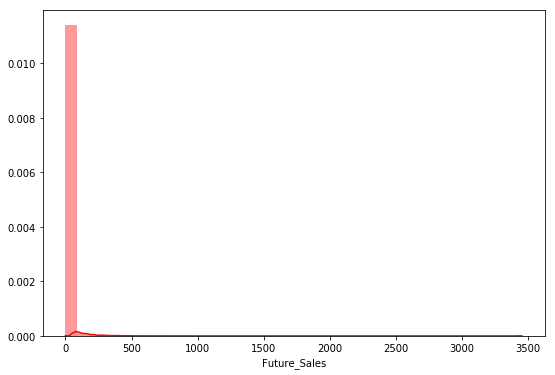

In [11]:
plt.figure(figsize=[9,6])
sns.distplot(y, bins=40, color='red')

#### We see that the number of non-returning customers dominates the distribution (0 Future sales values). 
#### So let's try to visualise only those returning customers (future sales>0) 

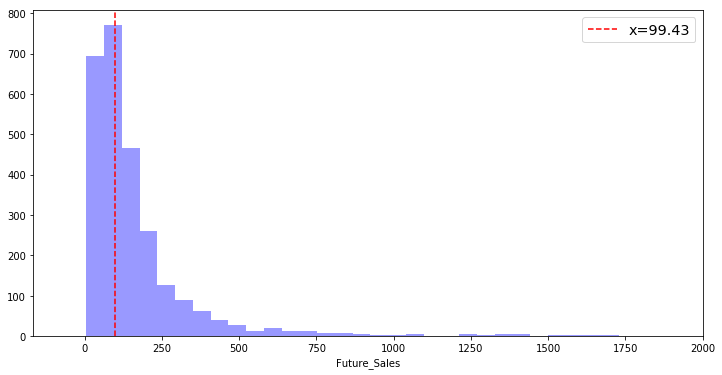

In [12]:
plt.figure(figsize=[12,6])
return_sales = data[data['Future_Sales']>0]['Future_Sales']
fig=sns.distplot(return_sales, bins=60, color='blue', kde=False)
fig.set_xlim(right=2000)
fig.axes.axvline(x=return_sales.mode().max(), color="red", linestyle='dashed', label="x={}".format(return_sales.mode().max()))
fig.legend(fontsize='x-large')

### Let's see how future sales vary with each continuous features & some numeric categorical features

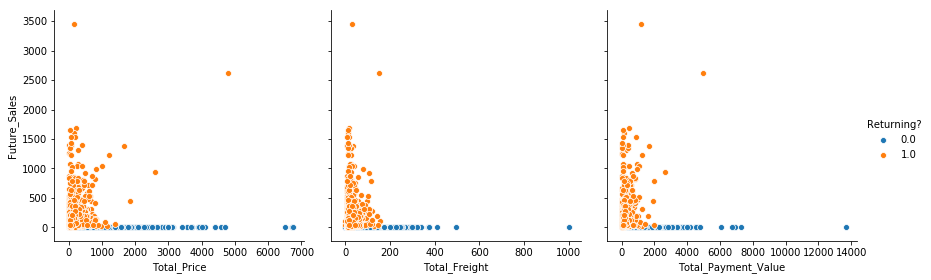

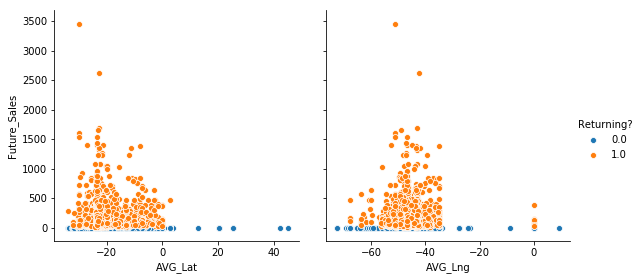

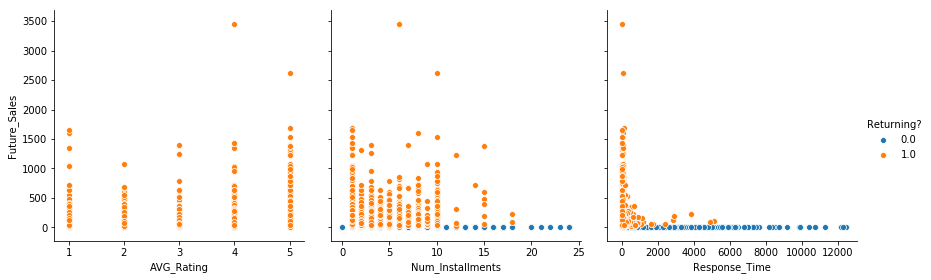

In [13]:
sns.pairplot(data, x_vars =['Total_Price','Total_Freight','Total_Payment_Value'], y_vars=['Future_Sales'],aspect=1, height=4, hue='Returning?')
sns.pairplot(data, x_vars =['AVG_Lat','AVG_Lng'], y_vars=['Future_Sales'],aspect=1, height=4, hue='Returning?')
sns.pairplot(data, x_vars =['AVG_Rating','Num_Installments','Response_Time'], y_vars=['Future_Sales'],aspect=1, height=4, hue='Returning?')

#### 1. We can see that categories like "Payment Value" and "Response Time" seems to indicate that lower values (cheaper purchases and eager customer response/feedback) seems to indicate that they will return again and higher future sales. This seems understandable

#### 2. On the other hand, there seems to be little relationship between where the customers are located and amount of future sales
#### 3. Num of installments & average rating also seem to have little relation ship to future sales. Though customer who chose num_installments > 10 appear to spend less in the future

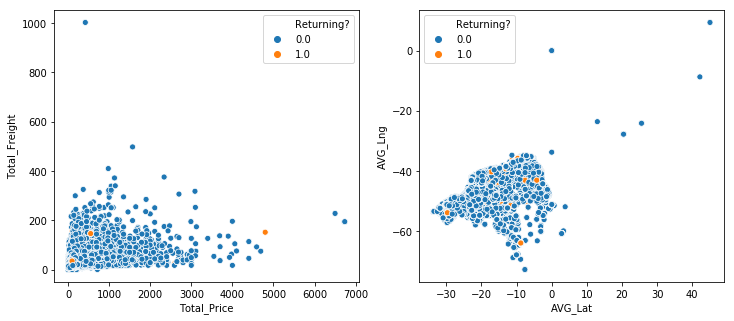

In [14]:
fig, ax = plt.subplots(ncols=2)
fig.set_figwidth(12)
fig.set_figheight(5)
sns.scatterplot(x=data['Total_Price'], y=data['Total_Freight'], hue=data['Returning?'], ax=ax[0])
sns.scatterplot(x=data['AVG_Lat'], y=data['AVG_Lng'], hue=data['Returning?'], ax=ax[1])

#### 4. However, when features are combined together, those who will and won't return appear less separable

### Now let's see the correlation between variables

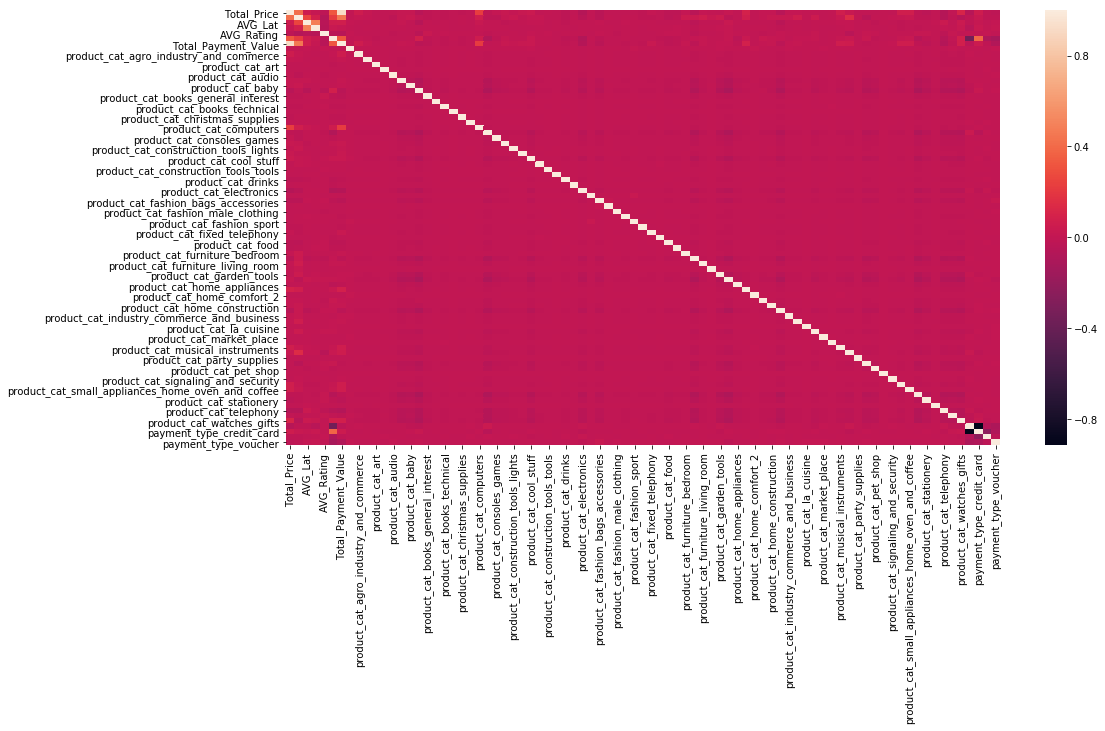

In [15]:
plt.figure(figsize=[16,8])
sns.heatmap(X.corr())

### There seem to be 2 regions where strong correlation (absolute corr value>0.7) happens

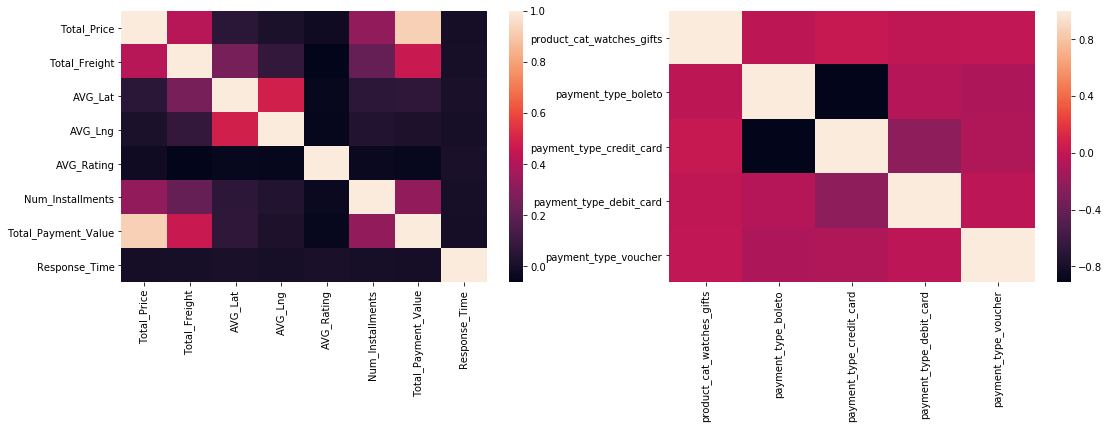

In [16]:
fig, ax = plt.subplots(ncols=2)
fig.set_figwidth(18)
fig.set_figheight(5)
sns.heatmap(data=X.iloc[:,:8].corr(), ax=ax[0])
sns.heatmap(data=X.iloc[:,-5:].corr(), ax=ax[1])

#### As evident from the correlation heatmap, we can see that the following pair of features have very high correlation which can leads to double influece & affect our subsequent prediction results . They are
    1. Total_Payment_Value & Total_Price
    2. Payment_Type_Boleto & Payment_Type_Credit_Card
#### For each pair we are going to remove 1 feature from X altogether

In [15]:
X_final = X.drop(labels=['Total_Payment_Value', 'payment_type_credit_card'], axis=1)

## B. Strategy 1: Predicting Future Sales without classification first<font size=3>
1. We are going to use 2 regressions here. One is a linear regressor and one being non-linear

    * For linear regressor, most common are simple linear regressor (in the form of y = a1x1 + a2x2 + ... aNxN + b)
               
    * We will use Lasso version of the linear regressor, which apply a regularization/penalizing term on the coefficients of the independent features and can perform automatic feature selection (explained below)
    
    
2. For non-linear regressor we can use Decision Trees and its collection/ensemble such as RandomForest
    * The way a decision tree predict a continuous variable is by divide the feature space into "regions". For a 2-D case with only 2 features, this 'region" takes the form of a rectangular area 
    * training samples lying in the same region are averaged to give a prediction value particular to that region. Any test point failling to same region will get this value
    * a random forest is a collection of trees predicting in parallel independently from one another and their results are aggregated (more on this later)
</font>

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state=101)

X_train_no_prod_cat = X_train.drop(columns=list(X_train.columns[8:-4]))
X_test_no_prod_cat = X_test.drop(columns=list(X_test.columns[8:-4]))

### Using Linear Regression

1. This is the most simple regressor which will fit a straight line through the data points that minimize loss = MSE
(mean squared of distance between what is predicted by the fit (y_hat) and each data point (y), averaged over the entire training set)
2. Lasso is a means to regularize the fit, to prevent overfitting to the data points, by adding a regularization term to the loss function MSE
<img src="images/Lasso_Loss.png">
3. This as the effect of "pushing" the coefficient, of any feature that does not explain the variation in predicted values y well, to zero. Y here is future sales
***N is  the number of data points & gamma is chosen penalizing parameter

In [17]:
from sklearn.linear_model import LassoCV
linear = LassoCV(normalize=True, cv=3) #Here we let the model select the penalizing parameter automatically
linear.fit(X_train, y_train)
reg_y_pred1 = linear.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,reg_y_pred1)))
print(r2_score(y_test,reg_y_pred1))

46.611784603584745
0.0006131585665088979


#### <font color=blue>Very bad result in terms of r2-score

In [20]:
#Lasso will assign 0 value to an unimportant feature (leading to automatic feature selection)
#Only important features will have coefficient. The most 10 importat features according to this model are
coeff_list = list(linear.coef_)
coeff_list.sort(key=abs)
coeff_list.reverse()
for i in range(10):
        print(X_final.columns[i], coeff_list[i])

Total_Price 0.21975765110832554
Total_Freight 0.2113029668001356
AVG_Lat 0.0025708182930386436
AVG_Lng 0.0
AVG_Rating -0.0
Num_Installments 0.0
Response_Time -0.0
product_cat_agro_industry_and_commerce -0.0
product_cat_air_conditioning -0.0
product_cat_art -0.0


#### Surprisingly only 2 features seem to be relevant to future sales prediction in this model (and a little of Latitude)

### Using Random Forest Regressor
<font size=3>  
1. A RandomForest is a collection (an ensemble) of decision trees that are fitted to the predictors X to predict Y, in a parallel manner. The predictions from all trees are then averaged to arrive at the final predicted value 

***An example of a decision tree regressor having only 2 features. Each leaf is a node at the lowest level that cannot be splitted further. The predicted value of a leaf is the average of all values of the datapoints which fall into that leaf   

<img src="images/Decision Tree.png" size=2, width="600">
    
2. Here we limit the number of available features to choose from, for each split of each tree, to be only sqrt of total number of features. This has an effect of decorrelating between trees and thus reduce high variance & possibility of overfitting (which can arrive from trees choosing too similar set of features among their individual initial splits). 

3. Also we will use the "gini" criteria for each split along the tree:

<img src="images/Gini_Index_print.png" size=2, width="500">

4. GridSearch is used to decide the number of trees of the forest (grid search evaluate different model's performance on the validation set. Default value for val set is 1/3 of the training set)
     
5. We also choose min_samples_leaf and min_samples_split to be 2,4 instead of 1,2 in order to reduce overfitting and high variance (due to the large num of features we have for this problem)

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest1 = RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, max_features='sqrt', n_jobs=10)
param_grid_RFR = {'n_estimators':[10,30,100]}

In [22]:
from sklearn.model_selection import GridSearchCV
reg_grid1 = GridSearchCV(estimator=forest1, param_grid=param_grid_RFR, verbose=0)
reg_grid1.fit(X_train, y_train)
reg_y_pred2 =  reg_grid1.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,reg_y_pred2)))
print(r2_score(y_test,reg_y_pred2))

46.812350815056895
-0.008005883963791538


In [23]:
best_forest_reg = reg_grid1.best_estimator_
best_forest_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### <font color=blue>Result of such a complex regressor is even slightly worse than linear regressor

In [24]:
X_features_importances = reg_grid1.best_estimator_.feature_importances_
top_ten =list(X_features_importances.argsort()[-10:])
top_ten.reverse()
for i in top_ten:
        print(X_final.columns[i], X_features_importances[i])

Total_Price 0.19579606755045414
Total_Freight 0.1667409052853353
AVG_Lng 0.16404255176682844
AVG_Lat 0.16276836741741632
Response_Time 0.1179018211151554
Num_Installments 0.05178086772678164
AVG_Rating 0.03486331446984235
payment_type_boleto 0.012425286848501436
product_cat_housewares 0.006060055089213916
product_cat_automobile 0.005638016762010168


### We can see, Total_Price and Total_Freight are among the most important features on which the forest split its brances on. But in this case, the forest decides to take into account both Location of the customers + their Response Time. The remaining features have little importance (value <0.1)

### <font color=blue> Sadly, the performance was worse than the simple Lasso Regressor

### What about eliminating the product cats feature from X and try again. As we can see above, none of the product cat has importance value > 0.1. Will it help? Let's find out

In [25]:
current_regressor = reg_grid1.best_estimator_
current_regressor.fit(X_train_no_prod_cat, y_train)
reg_y_pred3 =  current_regressor.predict(X_test_no_prod_cat)
print(np.sqrt(mean_squared_error(y_test, reg_y_pred3)))
print(r2_score(y_test, reg_y_pred3))

46.88628386497772
-0.011192384897901198


### <font color=red> No it doesn't help! </font>
### Using PCA to transform the feature space before fitting
<font size=3>
**PCA is a form of dimensionality reduction. It is short for Principle Component Analysis
1. There are many reasons why we might want to do that
* The transformation will reduce the original number of features to a lower number that can still explain the most variance of the training data points
* This sometimes will prove an effective method to mitigate high variation problem (and thus over-fitting to the training set) due to large number of features. Let's see if this can help us, in this case, to arrive at a better fit to the test set
* We will only apply PCA to the Forest model because Lasso already have the automatic feature selection property inherent in its formula

In [26]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=6)
X_train_transformed = pca.fit_transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

# Redo with Decision Trees
current_regressor.fit(X_train_transformed, y_train)
reg_y_pred4 =  current_regressor.predict(X_test_transformed)
print(np.sqrt(mean_squared_error(y_test, reg_y_pred4)))
print(r2_score(y_test,reg_y_pred4))
print()

47.158300545901135
-0.02295954043515125



### <font color=red> Also doesn't help</font>
### Using Other Regressors? 
.
<font size=3>

1) Polynomial regressors (splines or not splines) are not attempted because there would be many terms generated (both interaction terms and power terms) for the preditor (there is already 70+ features) and hence such a predictor will run very slowly and very prone to over-fitting due to high variance  
   
2) Linear SVR was not attempted because the result obtained would be quite similar to Lasso, due to being also a linear model, albeit its method of fitting is different (Lasso will try to minimize total MSE of all points, while SVR will try to minimize the error terms of only points lying outside its margin (whose width is maximized). 

3) On the other hand, Kernelized SVR offers non-linearity without resorting to substantially increasing the number of features available. However, both Linear and Kernlized SVR won't have automatic feature selection 

4) Last but not least, both forms of SVR runs very slowly on large training data with many datapoints due to it having to consider all data points to decide which of them to be treated as support vectors and which of them not 

5) KNN regressor has also been tested by me in a separte kernel and appeared to run very slowly (possibly due to large number of training points from which the predictor needs to calculate all available distances) yet also doesn't produce better MSE figures compared to the above 2 methods

## C. Strategy 2: Predicting whether a customer will return after first purchase,  then use that prediction to generate future sales
<font size=3>
1. Those predicted as "No Return" will have future sales predicted 0
2. Those predicted as "Returning" will have future sales predicted >0

### <font color=red>STEP 1: CLASSIFY FIRST

In [27]:
y_label = data['Returning?']
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_label_train, y_label_test = train_test_split(X_final, y_label, test_size=0.25, random_state=101)

X_train_no_prod_cat = X_train.drop(columns=list(X_train.columns[8:-4]))
X_test_no_prod_cat = X_test.drop(columns=list(X_test.columns[8:-4]))

### Using Simple Logistic Regression Classifier

* Logistic Regression takes result of the linear regression and apply a sigmoid transformation on it to arrive at a probability of whether customer will return (a value between 0 and 1). Prob >0.5 is assigned label 1

* the weights/coefficients of the terms in the linear regression are adjusted so that cross-entropy loss (the mismatch between predicted labels & true labels in the training set) is minimized 

In [33]:
from sklearn.linear_model import LogisticRegressionCV
logi = LogisticRegressionCV(cv=3, max_iter=100, n_jobs=10)
param_grid = {'Cs':[1,10,100], 'class_weight':[{0:1,1:35},'balanced']}
#we are going to use cross validation on training set with cv=3 before applying prediction on the test  set

In [34]:
#Here we use f1 score because we care equally about both "returning" and "non-returning" predictions, 
#We don't use accuracy score to avoid prediction paradox (a dummy that guess all customers as "non-returning")
#would have high accuracy but is utterly useless
class_grid1 = GridSearchCV(logi, param_grid=param_grid, scoring='f1', verbose=1)
class_grid1.fit(X_train, y_label_train)
class_y_pred1 = class_grid1.predict(X_test)
print(classification_report(y_label_test, class_y_pred1))
print(confusion_matrix(y_label_test, class_y_pred1))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.3min finished


             precision    recall  f1-score   support

        0.0       0.98      0.62      0.76     23115
        1.0       0.03      0.50      0.07       633

avg / total       0.95      0.62      0.74     23748

[[14329  8786]
 [  315   318]]


In [35]:
#Best estimator 
best_logi = class_grid1.best_estimator_
best_logi

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=10, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

#### Eliminating trunk features from logistic regression model

In [36]:
import scipy.stats as stat
def get_p_values(model,X,y):
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(model.decision_function(X))))
        F_ij = np.dot((X/denom[:,None]).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.array([np.sqrt(Cramer_Rao[i,i]) for i in range(Cramer_Rao.shape[0])]) # sigma for each coefficient
        z_scores = model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        return p_values

In [37]:
X_train_arr = np.array(X_train)
p_values = get_p_values(class_grid1.best_estimator_,X_train_arr,y_label_train)
p_values_with_index = [i for i in enumerate(p_values)]
p_values_with_index.sort(key=lambda x:x[1])
X_columns=data.drop(['customer_unique_id','customer_unique_id.1', 'Future_Sales',
       'Returning?', 'NumReturns','Order_Rank','Order_Time','Total_Payment_Value'], axis=1).columns
index_list = []
for row in p_values_with_index:
    if row[1] <= 0.05:
        index_list.append(row[0])
        print (X_columns[row[0]], ':',row[1])

Num_Installments : 4.629380744181564e-121
Total_Price : 6.442198285110217e-53
payment_type_debit_card : 8.46172068905009e-25
product_cat_furniture_decor : 9.504136238123055e-16
product_cat_bed_bath_table : 7.669667508039514e-15
product_cat_fashion_bags_accessories : 1.0854417597607576e-12
AVG_Lat : 1.825890322081188e-11
AVG_Lng : 1.317132047332743e-10
product_cat_cool_stuff : 1.9808980054833903e-10
product_cat_sports_leisure : 3.1342008075864827e-10
payment_type_boleto : 1.516599943242305e-08
product_cat_watches_gifts : 3.315301264450949e-06
product_cat_electronics : 2.0832825088403067e-05
product_cat_garden_tools : 0.0001574846381236457
Total_Freight : 0.0002920045453112364
product_cat_automobile : 0.0004302393331128231
product_cat_baby : 0.0019681578012857495
AVG_Rating : 0.011314205345876896
product_cat_stationery : 0.02400730866182673
product_cat_consoles_games : 0.039567275257231374


In [38]:
X_train_simplified = X_train.iloc[:,index_list]
X_test_simplified = X_test.iloc[:,index_list]
improved_predictor = class_grid1.best_estimator_
improved_predictor.fit(X_train_simplified, y_label_train)
class_y_pred2 = improved_predictor.predict(X_test_simplified)
print(classification_report(y_label_test, class_y_pred2))
print(confusion_matrix(y_label_test, class_y_pred2))

             precision    recall  f1-score   support

        0.0       0.98      0.64      0.77     23115
        1.0       0.03      0.44      0.06       633

avg / total       0.95      0.64      0.76     23748

[[14837  8278]
 [  355   278]]


In [39]:
best_logi = improved_predictor
best_logi

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=10, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### We managed to get f1-score very close to the original classifier but slightly better at 76%. This is not bad. Let's see if we can do better with a different classifier
* We will use a non linear classifier, which will be the RandomForest Classifier
* Once again we will use f1 as the scoring metric

### Random Forest Classifer behave similarly to random forest regressor stated above. The only difference is that instead of predicting y as a continuous value for each test point, the forest will assign the label for that test point, based on the majority of training data points from the same leaf that the test point falls inside

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest2 = RandomForestClassifier(min_samples_split=4, min_samples_leaf=2, max_features='sqrt', n_jobs=10)
param_grid_CRF = {'n_estimators':[10,30,100], 'class_weight':[{0:1,1:35},'balanced']}
# Class weight option is determined from SQL query result
# Number of customer_unique_id that returns = 2638 customers
# Number of customers that won't return = 94990 - 2638 = 92352
# So occurrence ratio = 1:35 for Return: No return

In [41]:
from sklearn.model_selection import GridSearchCV
class_grid2 = GridSearchCV(estimator=forest2, param_grid=param_grid_CRF, verbose=1, scoring='f1')
class_grid2.fit(X_train, y_label_train)
class_y_pred3 =  class_grid2.predict(X_test)
print(classification_report(y_label_test,class_y_pred3))
print(confusion_matrix(y_label_test, class_y_pred3))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   42.8s finished


             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98     23115
        1.0       0.07      0.04      0.05       633

avg / total       0.95      0.96      0.96     23748

[[22795   320]
 [  610    23]]


In [42]:
best_forest_class = class_grid2.best_estimator_
best_forest_class

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 35},
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=10, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### The random forest has high f1 score but very low score for class "1. 
### Overall, we can see that one classifier performs quite well on the positive examples "1" but poorly on "0", while the other performs poorly on "0" but well on "1"

### What about other predictors?
1. Similarly to the case of regressor, both KNN classifier and SVM classifier turn out to run very slowly  
2. When tested in a separate Kernel, the SVM predictors ended up giving very similar classification to RanformForest, while KNN classifier ended up giving very similar prediction to a dummy predictor (which always predicts "non-returning" for all test data points)

### <font color=red>STEP 2. PREDICT FUTURE SALES AFTER CLASSIFICATION
### Having two separate regressor for each class. For each test instance
    1. Regressor for customers predicted as non-returning always return 0
    1. Regressor for customers predicted as returning trained on the whole training set

In [56]:
y_train = y[y_label_train.index]
y_test = y[y_label_test.index]
X_test_simplified = X_test.iloc[:, index_list]

linear.fit(X_train, y_train)
best_forest_reg.fit(X_train, y_train)

In [66]:
class NewRegessor():
    def __init__(self, classifier, predictor, combined=False, predicted_values=None):
        self.classifier = classifier
        self.regressor = predictor
        self.combined = combined
        self.predicted_values = predicted_values
    def predict(self, X_test1, X_test2):
        if self.combined==False:
            y_label_pred = self.classifier.predict(X_test1)
        else:
            y_label_pred = self.predicted_values
            assert y_label_pred!= None
        y_pred = self.regressor.predict(X_test2)
        results = np.array(y_label_pred)*np.array(y_pred)
        return results

## Building 4 new regressors as follows
<font size=3>
1. Logistic Classifier --> Linear Regressor
2. Logistic Classifier --> Random Forest Regressor
3. Random Forest Classifier --> Linear Regressor
4. Random Forest Classifier --> Random Regressor


In [68]:
ultimate1 = NewRegessor(classifier=best_logi, predictor=linear)
y_ultimate_pred1 = ultimate1.predict(X_test_simplified, X_test)
print(np.sqrt(mean_squared_error(y_test, y_ultimate_pred1)))
print(r2_score(y_test, y_ultimate_pred1))

46.73320689012609
-0.0046003680202439945


In [69]:
ultimate2 = NewRegessor(classifier=best_logi, predictor=best_forest_reg)
y_ultimate_pred2 = ultimate2.predict(X_test_simplified, X_test)
print(np.sqrt(mean_squared_error(y_test,y_ultimate_pred2)))
print(r2_score(y_test,y_ultimate_pred2))

46.808883479625976
-0.007856565887838007


In [70]:
ultimate3 = NewRegessor(classifier=best_forest_class, predictor=linear)
y_ultimate_pred3 = ultimate3.predict(X_test, X_test)
print(np.sqrt(mean_squared_error(y_test, y_ultimate_pred3)))
print(r2_score(y_test, y_ultimate_pred3))

46.83467570296607
-0.008967552582686666


In [73]:
ultimate4 = NewRegessor(classifier=best_forest_class, predictor=best_forest_reg)
y_ultimate_pred4 = ultimate4.predict(X_test, X_test)
print(np.sqrt(mean_squared_error(y_test, y_ultimate_pred4)))
print(r2_score(y_test, y_ultimate_pred4))

46.83973577462872
-0.009185584365503097


### Comparing the above preditions with the strategy 1's predictions (no first classification), we see no improvement


In [241]:
reg_y_pred1 =  linear.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,reg_y_pred1)))
print(r2_score(y_test,reg_y_pred1))
print()
reg_y_pred2 =  best_forest_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,reg_y_pred2)))
print(r2_score(y_test,reg_y_pred2))


46.611784603584745
0.0006131585665088979

46.81016655251311
-0.00791181912444272


# Conclusion <font size=3>
 1) None of the various methods performed are able to prevail above normal Lasso predictor in terms of correct prediction for future sales, used without classification at first
 
 2) A total of 2 regressors were used (Lasso and RanformForest Regressor) and 2 classifiers (RandomForest Classifier and Logistic Regression Classifier). All models (except for the Lasso) underwent extensive grid search first to select the best parameters for the model. For the classifiers, 'f1' is the chose citerion for scoring
 
 3) Classification first or no classification first also doesn't yield much difference
 
 4) All classifiers of whether the customer will return (positive) or no-return (negative) has large trade off between 2 label values
 
 5) All of the regressors are performing very poorly. R2 score very low  

# <font color=red size=6> Pulling out the big guns: Deep Learning with Neural Net

In [74]:
import tensorflow as tf
import keras as K

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Defining the neural model classes (classifier & regressor) and various internal functions to compile and run the model

In [256]:
import keras.backend as KB

class reg_neural_model():
    def __init__(self, X_train, y_train, X_test, y_test, num_layers, num_nodes, activation, 
                 regulizers=None, last_layer_activation='linear'):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.num_layers = num_layers
        self.num_nodes = num_nodes
        self.activation = activation
        self.regulizers = regulizers
        self.last_layer_activation = last_layer_activation
        assert self.num_layers == len(self.num_nodes)
        assert self.activation in ('tanh', 'relu')
        self.model = None
        self.y_pred = None
    def build(self):
        self.model = K.Sequential()
        for layer in range(self.num_layers-1):
            self.model.add(K.layers.Dense(units=self.num_nodes[layer], activation=self.activation, 
                               kernel_regularizer=self.regulizers))
        self.model.add(K.layers.Dense(1, activation=self.last_layer_activation))
    def print_summary(self):
        self.model.summary()
    def compile_n_predict(self, epoch_num=10, cv=3):
        self.model.compile(optimizer=K.optimizers.Adam(lr=0.0005), loss='mean_squared_error')
        self.model.fit(np.array(self.X_train), np.array(self.y_train), epochs=epoch_num, validation_split=1/cv)
        self.y_pred = self.model.predict(np.array(self.X_test))
        return self.y_pred
    def print_results(self):
        print('Mean_Squared_Err: {}'.format(np.sqrt(mean_squared_error(self.y_test, self.y_pred))))
        print('R2 Score: {}'.format(r2_score(self.y_test, self.y_pred)))

class class_neural_model():
    def __init__(self, X_train, y_label_train, X_test, y_label_test, num_layers, num_nodes, activation, 
                 regulizers=None, last_layer_activation='sigmoid'):
        self.X_train = X_train
        self.y_train = y_label_train
        self.X_test = X_test
        self.y_test = y_label_test
        self.num_layers = num_layers
        self.num_nodes = num_nodes
        self.activation = activation
        self.regulizers = regulizers
        self.last_layer_activation = last_layer_activation
        assert self.num_layers == len(self.num_nodes)
        assert self.activation in ('tanh', 'relu')
        self.model = None
        self.y_pred = np.zeros(shape=self.y_test.shape)
        self.metric = None
    def build(self):
        self.model = K.Sequential()
        for layer in range(self.num_layers-1):
            self.model.add(K.layers.Dense(units=self.num_nodes[layer], activation=self.activation, 
                               kernel_regularizer=self.regulizers))
        self.model.add(K.layers.Dense(1, activation=self.last_layer_activation))
    def print_summary(self):
        self.model.summary()
    def compile_n_predict(self, epoch_num=10, cv=3):
        def f1_score(y_true, y_pred):
            def recall(y_true, y_pred):
                true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
                possible_positives = KB.sum(KB.round(KB.clip(y_true, 0, 1)))
                recall = true_positives / (possible_positives + KB.epsilon())
                return recall
            def precision(y_true, y_pred):
                """Precision metric.

                Only computes a batch-wise average of precision.

                Computes the precision, a metric for multi-label classification of
                how many selected items are relevant.
                """
                true_positives = KB.sum(KB.round(KB.clip(y_true * y_pred, 0, 1)))
                predicted_positives = KB.sum(KB.round(KB.clip(y_pred, 0, 1)))
                precision = true_positives / (predicted_positives + KB.epsilon())
                return precision
            precision = precision(y_true, y_pred)
            recall = recall(y_true, y_pred)
            return 2*((precision*recall)/(precision+recall+KB.epsilon()))
        
        self.model.compile(optimizer=K.optimizers.Adam(lr=0.0005), loss='binary_crossentropy', metrics=[f1_score])
        self.model.fit(np.array(self.X_train), np.array(self.y_train), epochs=epoch_num, 
                       validation_split=1/cv, class_weight = {0:1, 1:35})
        self.y_pred = self.model.predict_classes(np.array(self.X_test))
        return self.y_pred
    def print_results(self):
        print(confusion_matrix(self.y_test, self.y_pred))
        print(classification_report(self.y_test, self.y_pred))


### We are going to use relatively deep neural net  with 4 layers (3 hidden + 1 output)

In [257]:
reg_model = reg_neural_model(X_train, y_train, X_test, y_test, 4, [32,16,8,1], 'relu')
class_model = class_neural_model(X_train, y_label_train, X_test, y_label_test, 4, [32,16,8,1], 'relu')

In [244]:
reg_model.build()
reg_neural_pred = reg_model.compile_n_predict()
reg_model.print_results()

Train on 47494 samples, validate on 23748 samples
Epoch 1/10
47494/47494 [==============================] - 4s 85us/step - loss: 1750.0526 - val_loss: 1387.3669
Epoch 2/10
47494/47494 [==============================] - 3s 61us/step - loss: 1739.1288 - val_loss: 1384.3657
Epoch 3/10
47494/47494 [==============================] - 3s 60us/step - loss: 1741.9676 - val_loss: 1382.2091
Epoch 4/10
47494/47494 [==============================] - 3s 65us/step - loss: 1739.5550 - val_loss: 1384.6616
Epoch 5/10
47494/47494 [==============================] - 3s 60us/step - loss: 1739.1430 - val_loss: 1383.2218
Epoch 6/10
47494/47494 [==============================] - 3s 64us/step - loss: 1740.1184 - val_loss: 1382.7159
Epoch 7/10
47494/47494 [==============================] - 3s 61us/step - loss: 1738.9766 - val_loss: 1379.9738
Epoch 8/10
47494/47494 [==============================] - 3s 62us/step - loss: 1738.0582 - val_loss: 1380.6886
Epoch 9/10
47494/47494 [==============================] - 3s 6

In [258]:
class_model.build()
class_neural_pred = class_model.compile_n_predict()
class_model.print_results()

Train on 47494 samples, validate on 23748 samples
Epoch 1/10
47494/47494 [==============================] - 5s 103us/step - loss: 1.4993 - f1_score: 0.0524 - val_loss: 1.3671 - val_f1_score: 0.0551
Epoch 2/10
47494/47494 [==============================] - 3s 71us/step - loss: 1.4470 - f1_score: 0.0572 - val_loss: 1.4997 - val_f1_score: 0.0533
Epoch 3/10
47494/47494 [==============================] - 3s 72us/step - loss: 1.4114 - f1_score: 0.0542 - val_loss: 1.4082 - val_f1_score: 0.0529
Epoch 4/10
47494/47494 [==============================] - 3s 74us/step - loss: 1.3647 - f1_score: 0.0551 - val_loss: 1.3823 - val_f1_score: 0.0530
Epoch 5/10
47494/47494 [==============================] - 3s 73us/step - loss: 1.3777 - f1_score: 0.0562 - val_loss: 1.3848 - val_f1_score: 0.0538
Epoch 6/10
47494/47494 [==============================] - 4s 75us/step - loss: 1.3623 - f1_score: 0.0547 - val_loss: 1.3533 - val_f1_score: 0.0546
Epoch 7/10
47494/47494 [==============================] - 4s 76us/s

In [261]:
y_ultimate_pred5 = reg_neural_pred1*class_nerual_pred
print(np.sqrt(mean_squared_error(y_test, y_ultimate_pred5)))
print(r2_score(y_test, y_ultimate_pred5))

46.77810702482591
-0.006531686821407812


In [341]:
#Dataframe showing all predictions so far against true future sales values
result_list=[y_test, reg_y_pred1, reg_y_pred2, y_ultimate_pred1, y_ultimate_pred2,
         y_ultimate_pred3, y_ultimate_pred4, reg_neural_pred1, y_ultimate_pred5]
result_list_fin = [list(i.ravel()) for i in result_list]

predicted_data = pd.DataFrame(data = np.column_stack(result_list_fin), 
                              columns=['Y_true','Lasso','RandomForestReg',
                                       'Logi->Lasso','Logi->RandomForestReg','RandomForestClass->Lasso',
                                       'RandomForestClass->RandomForestReg','Neural_Reg','Neural_Class->Neural_Reg'])

predicted_data[predicted_data['Y_true']>0].head(20)

,Y_true,Lasso,RandomForestReg,Logi->Lasso,Logi->RandomForestReg,RandomForestClass->Lasso,RandomForestClass->RandomForestReg,Neural_Reg,Neural_Class->Neural_Reg
101,160.585,3.753113,7.848582,0.000000,0.000000,0.0,0.0,4.610475,4.610475
139,28.400,5.271042,6.757334,5.271042,6.757334,0.0,0.0,6.477230,6.477230
189,171.800,5.670742,6.530689,5.670742,6.530689,0.0,0.0,6.891901,6.891901
193,86.910,4.368530,9.419052,0.000000,0.000000,0.0,0.0,4.292589,0.000000
208,164.160,5.678224,6.449836,5.678224,6.449836,0.0,0.0,7.045053,7.045053
217,171.440,4.228946,9.381109,0.000000,0.000000,0.0,0.0,5.821688,0.000000
238,153.900,4.100174,2.285539,0.000000,0.000000,0.0,0.0,4.022354,0.000000
247,158.580,4.281123,5.166020,4.281123,5.166020,0.0,0.0,5.151401,0.000000
345,72.980,6.004717,11.239710,6.004717,11.239710,0.0,0.0,7.470075,0.000000
411,15.150,4.629175,12.317158,4.629175,12.317158,0.0,0.0,6.586315,6.586315


# Final Conclusion <font size=3>
 1) Even the big guns are not performing better than the simple Lasso model
 
 2) The neural net classification is even worse compared to the random forest model
 
 3) Perhaps we have to admit that there is absolutely no link at all between a customer's attributes at point of first purchase and future sales expected from that customer
 
 4) Does such circumstances arise often in the corporate world? That the defined business objective cannot be met after much exploration?

<font color = blue>
## !!! FAILED TO ACHEIVE THE DETERMINED BUSINESS OBJECTIVE: UNABLE TO 
## SUCCESSFULLY PREDICT FUTURE SALES FROM INFORMATION OBTAINED DURING THE 
## CUSTOMER'S FIRST PURCHASE :((
## LEARNT A LOT FROM THIS THOUGH!